In [2]:
import SimpleITK as sitk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def displayImage(image):
    plt.imshow(sitk.GetArrayViewFromImage(image))
    plt.axis("off")
    plt.show()

In [4]:
def downloadImage(path):
    reader = sitk.ImageFileReader()
    reader.SetImageIO("NiftiImageIO")
    reader.SetFileName(path)
    image = reader.Execute()
    return image

In [8]:
interrsect_1_path = '/home/jbregazzi/Documents/josephine/Datasets/StrokeLesionSegmentation/flair/interrsect/images/INTERRSeCT01-005_FollowUp.nii.gz'

img_1_skull = downloadImage(interrsect_1_path)

In [10]:
image = img_1_skull

print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

376
512
48


In [19]:
image1 = sitk.GetArrayFromImage(img_1_skull)

print(image1.shape)
# print(image1.GetHeight())
# print(image1.GetDepth())

(48, 512, 376)


In [20]:
image1_0_arr = image1[0]
print(image1_0_arr.shape)

(512, 376)


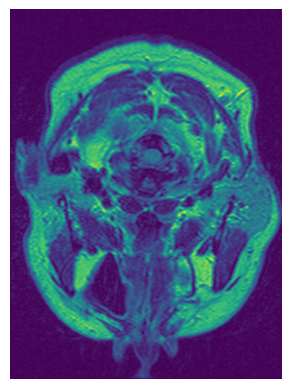

In [21]:
image1_0 = sitk.GetImageFromArray(image1_0_arr)
displayImage(image1_0)

In [26]:
def getArrayOfSlices(image3d):
    array_slices = []
    slices_nda = sitk.GetArrayFromImage(image3d)
    
    for i in range(image3d.GetDepth()):
        array_slices.append(sitk.GetImageFromArray(slices_nda[i]))
    
    return array_slices

In [27]:
img_1_skull_slices = getArrayOfSlices(img_1_skull)

print(len(img_1_skull_slices))

48


In [29]:
def getAveragePixelShade(image):
    image_nda = sitk.GetArrayFromImage(image)
    return np.mean(image_nda)

In [30]:
avg_intensity_1 = getAveragePixelShade(img_1_skull)
print(avg_intensity_1)

176.09470004900126


In [44]:
def myshow(img):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda)

def flip_vertical_2d(image):
    return image[::-1, :]
    

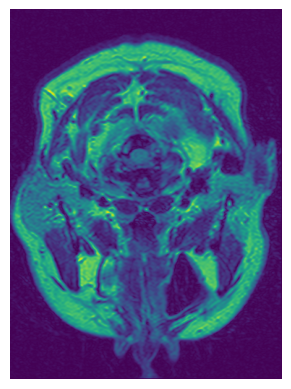

In [46]:
flipped_image1_0 = flip_vertical_2d(image1_0)
displayImage(flipped_image1_0)

In [47]:
def flip_horizontal_2d(image):
    return image[:, ::-1]

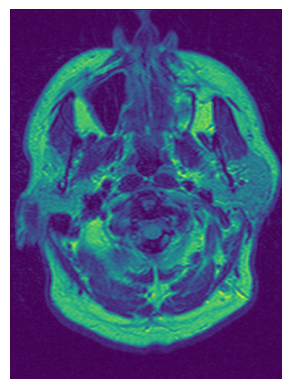

In [61]:
flipped_1_0 = flip_horizontal_2d(image1_0)
displayImage(flipped_1_0)

In [89]:
#displayImage(flipped_1_0 > 300)

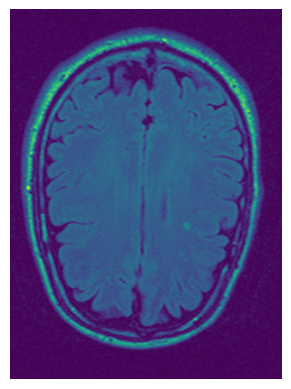

In [90]:
img_1_32 = img_1_skull_slices[32]

displayImage(img_1_32)

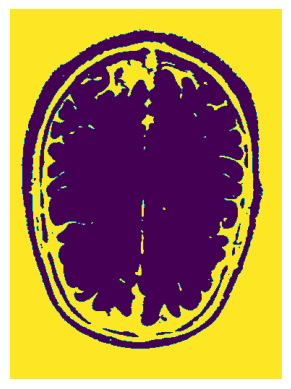

In [111]:
displayImage(img_1_32 > 170 + img_1_32 < 350)

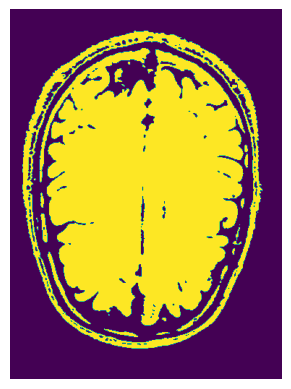

In [120]:
displayImage((img_1_32 > 200) + (img_1_32 < 600))

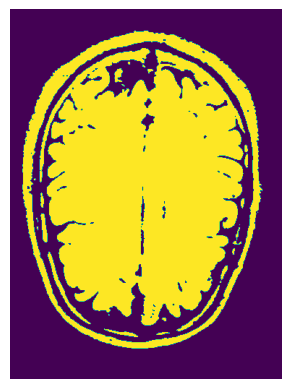

In [123]:
image_1_32_binary = ((img_1_32 > 200) + (img_1_32 <800))
displayImage(image_1_32_binary)

In [ ]:
for pixel in image_1_32_binary:
    if pixel 